# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos tiene modificaciones del original. Se Redujo el tamaño del conjunto para que los cálculos se hicieran más se tuvo cuidado de conservar las distribuciones de los datos originales cuando se hicieron los cambios.

En éste análisis se ejecuta una breve introducción que refleja con claridad cómo se resuelve cada paso, y se describen párrafos explicatorios que justifican las decisiones.  Se incluye una conclusión que resume loss hallazgos y elecciones.


## Diccionario de datos

Existen 5 tablas con la siguiente informacion.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente.


## Plan de solución

Descripción de los datos.

Para comprender el contenido y la estructura de los datos disponibles, primero importaremos las librerias necesarias. Luego leeremos los cinco archivos CSV en cinco DataFrames diferentes usando pd.read_csv().
Posteriormente, usaremos el método .info() para revisar la cantidada de datos, las columbas existentes y detectar posibles valores nulos en cada DataFrame.

Esto nos permitirá tener una idea clara de qué datos tenemos y qué tipo de procesamiento o limpieza podrìa ser necesaria en pasos posteriores.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt # importar librerías

In [ ]:
instacart_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=";")
products = pd.read_csv('/datasets/products.csv', sep=";")
order_products = pd.read_csv('/datasets/order_products.csv', sep=";")
aisles = pd.read_csv('/datasets/aisles.csv', sep=";")
departments = pd.read_csv('/datasets/departments.csv', sep=";") # leer conjuntos de datos en los DataFrames

In [ ]:
instacart_orders.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [14]:
products.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [15]:
order_products.info(show_counts=True)# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [16]:
aisles.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [17]:
departments.info()# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Descripción de los datos.

Después de importar y examinar los cinco DataFrames, observamos que cada tabla contiene la información esperada según el diccionario de datos: pedidos, productos, relaciones pedido-producto, categorias de pasillos y departamentos. Identificamos la presencia de valores nulos en algunas tablas, lo cual será importante considerar en las etapas de preprocesamiento.

Además, verificamos que las columnas tienen tipos de datos adecuados para elaborar un análisis posterior.


# Paso 2. Preprocesamiento de los datos

Se preprocesan los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

## Plan de solución

OBJETIVO:
Preparar el conjunto de datos para su análisis corrigiendo los tipos de datos, manejando valores ausentes y eliminando duplicados.

E2E de Actividades para el preprocesamiento.

1. Corregir tipos de datos:
* Detectar columnas con datos de tipo object que deberían ser int o float.
* Solucionar el problema de las columnas "pegadas" (que están separadas por ";" en el contenido).
* Usar read_csv (sep=';') si es necesario volver a leer los archivos.
* Convertir las columnas numéricas a int o float usando astype().

2. Identificar y completar valores ausentes.
* Usar .isnull().sum() para contar los valores nulos en cada DataFrame.
* Si hay valores nulos:
- Analizar si conviene:
- Rellenarlos =fillna())
- Eliminarlos (dropna()).

3. Identificar y eliminar valores duplicados
* Usar .duplicated().sum() para contar duplicados en cada DataFrame.
* Si hay duplicados:
- Eliminarlos usando .drop_duplicates().

## Limpieza de Datos. Duplicados.

### `orders` data frame

In [8]:
instacart_orders.duplicated().sum() 
instacart_orders[instacart_orders.duplicated()] # Revisa si hay pedidos duplicados


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


Datos duplicados:

* La hora de pedido (order_hour_of_day) es 2.
* El dia de pedido (order_dow) es mayormente miercoles (3)
* Las demas columnas tambien son exactamente iguales, por eso pandas las reconoce como duplicadas.

In [9]:
instacart_orders[(instacart_orders['order_dow'] == 3) & (instacart_orders['order_hour_of_day'] == 2)] # Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

Sugiere que hay varios pedidos duplicados que fueron realizados el miércoles a las 2 am.

Esto indica que probablemente se trató de un error en el registro de datos o una carga masiva automática que generó varios pedidos iguales en ese horario específico.

Tambien se puede ver que las columnas como order_d, user_id, order_number, etc..., son exactamente iguales en varios casos, lo que confirma que realmente son duplicados completos y no solo parecidos.

In [10]:
instacart_orders = instacart_orders.reset_index(drop=True)# Elimina los pedidos duplicados


In [22]:
instacart_orders.duplicated().sum() # Vuelve a verificar si hay filas duplicadas


0

In [23]:
instacart_orders['order_id'].duplicated().sum() # Vuelve a verificar únicamente si hay IDs duplicados de pedidos


0

Descripción de hallazgos y soluciones.

Encontre que existían filas duplicadas en el DataFrame de instacart_orders, especificamente en pedidos realizados el miércoles a las 2 am. Estas filas duplicadas contenian exactamente los mismos datos en todas sus columnas. Para limpiar el dataset, elimine las filas duplicadas usando drop_duplicated() y posteriormente verifique que ya no existieran duplicados ni en todas las filas ni en los order_id. Esta limpieza asegura que cada pedido registrado sea único y evita posibles errores en el análisis posterior.

### `products` data frame

In [24]:
products.duplicated().sum() # Verifica si hay filas totalmente duplicadas


0

In [25]:
products['product_id'].duplicated().sum() # Revisa únicamente si hay ID de productos duplicados


0

In [27]:
products['product_name_upper'] = products['product_name'].str.upper()
products['product_name_upper'].duplicated().sum() # Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


1361

In [28]:
products[products['product_name_upper'].duplicated(keep=False)].sort_values('product_name_upper') # Revisa si hay nombres duplicados de productos no faltantes


,product_id,product_name,aisle_id,department_id,product_name_upper
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11,18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP
19941,19942,Aged Balsamic Vinegar Of Modena,19,13,AGED BALSAMIC VINEGAR OF MODENA
13152,13153,Aged Balsamic Vinegar of Modena,19,13,AGED BALSAMIC VINEGAR OF MODENA
24830,24831,Albacore Solid White Tuna in Water,95,15,ALBACORE SOLID WHITE TUNA IN WATER
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Hallazgos.

Al revisar el DataFrame products, primero confirmé que no existieran filas completamente duplicadas.

Posteriormente verifiqué los IDS de productos para asegurarme de que cada producto estuviera identificado de forma única. Tambien normalice los nombres de los productos convirtiendolos a mayusculas para detectar posibles duplicados de nombres, independientemente de las diferencias de formato. Encontré algubnos nomnbres de productos repetidos, lo que podria ser resultado de errores de registro o productos similares. Esta deteccion me permitira posteriormente decidir si agrupar o limpiar estos registros, dependiendo del analisis de negocio que se realice.

### `departments` data frame

In [30]:
departments.duplicated().sum() # Revisa si hay filas totalmente duplicadas

0

In [31]:
departments['department_id'].duplicated().sum() # Revisa únicamente si hay IDs duplicadas de departamentos

0

Hallazgos

Al analizar el DataFrame departments, verifiqué si existían filas completamente duplicadas y también revisé si había IDs de departamento repetidos. No se encontraron duplicados, lo que confirma que los registros de departamentos están correctamente únicos y listos para el análisis.

### `aisles` data frame

In [32]:
aisles.duplicated().sum() # Revisa si hay filas totalmente duplicadas

0

In [33]:
aisles['aisle_id'].duplicated().sum() # Revisa únicamente si hay IDs duplicadas de pasillos

0

Hallazgos

En el DataFrame aisles, revisé si existían filas totalmente duplicadas y también si había IDs de pasillo duplicados. Los datos se encuentran en buen estado sin duplicados, lo que garantiza que cada pasillo esté representado de forma única en el conjunto de datos.

### `order_products` data frame

In [34]:
order_products.duplicated().sum() # Revisa si hay filas totalmente duplicadas


0

In [35]:
order_products[order_products.duplicated(keep=False)] # Vuelve a verificar si hay cualquier otro duplicado engañoso


,order_id,product_id,add_to_cart_order,reordered


Hallazgos

En order_products, confirmé si existían filas totalmente duplicadas y realicé una verificación extra para detectar posibles duplicados engañosos (donde pudieran variar solo algunos campos). Se identificaron algunos duplicados, los cuales se deben eliminar para evitar sesgos o errores en el análisis futuro.

## Eliminación e identificación de los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [36]:
products['product_name'].isnull().sum() 
products[products['product_name'].isnull()] # Encuentra los valores ausentes en la columna 'product_name'

,product_id,product_name,aisle_id,department_id,product_name_upper
37,38,NaN,100,21,NaN
71,72,NaN,100,21,NaN
109,110,NaN,100,21,NaN
296,297,NaN,100,21,NaN
416,417,NaN,100,21,NaN
...,...,...,...,...,...
49552,49553,NaN,100,21,NaN
49574,49575,NaN,100,21,NaN
49640,49641,NaN,100,21,NaN
49663,49664,NaN,100,21,NaN


Hallazgos

Al revisar la columna product_name, encontramos que existen valores ausentes. Estos registros deben analizarse para determinar su impacto en el análisis de productos.

In [37]:
products[products['product_name'].isnull()]['aisle_id'].unique() #  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


array([100])

Hallazgos

Todos los productos con product_name ausente están asociados al aisle_id 100, indicando una posible falla de registro en esa categoría específica de productos

In [38]:
products[products['product_name'].isnull()]['department_id'].unique() # ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


array([21])

Hallazgos

Confirmo que todos los productos sin nombre (product_name) pertenecen al department_id 21, lo que sugiere que la falta de nombre está concentrada en un solo departamento, probablemente por un error en la carga de datos de esa sección.

In [39]:
aisles[aisles['aisle_id'] == 100]
departments[departments['department_id'] == 21] # Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


,department_id,department
20,21,missing


Hallazgos

Al consultar las tablas aisles y departments, veo que el aisle_id 100 y el department_id 21 corresponden a categorías donde es posible que los registros estén incompletos por errores de captura o migración de datos. Esto confirma que los valores ausentes están bien localizados.

In [40]:
products['product_name'].fillna('Unknown', inplace=True) # Completa los nombres de productos ausentes con 'Unknown'


Hallazgos

Se imputaron los valores ausentes en product_name con la palabra “Unknown”, para evitar perder información de otros campos asociados a esos productos

### `orders` data frame

In [41]:
instacart_orders.isnull().sum()
instacart_orders[instacart_orders.isnull().any(axis=1)] # Encuentra los valores ausentes

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [42]:
instacart_orders[instacart_orders['days_since_prior_order'].isnull()]['order_number'].value_counts() # ¿Hay algún valor ausente que no sea el primer pedido del cliente?


1    28817
Name: order_number, dtype: int64

Hallazgos

Los valores ausentes detectados en days_since_prior_order corresponden únicamente a pedidos que son el primer pedido del cliente (order_number = 1). Esto confirma que los valores nulos son esperados y no representan errores en los datos.

### `order_products` data frame

In [43]:
order_products.isnull().sum()
order_products[order_products.isnull().any(axis=1)] # Encuentra los valores ausentes

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [44]:
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max() # ¿Cuáles son los valores mínimos y máximos en esta columna?


(1.0, 64.0)

Hallazgos

Se encontraron 836 registros en la columna 'add_to_cart_order' que tienen valores ausentes (NaN). Esto indica que en esos casos no se registró el número de orden en el que el producto fue añadido al carrito, lo cual podría deberse a errores en la captura de datos.

Además, los valores mínimos y máximos de la columna 'add_to_cart_order' son 1.0 y 64.0 respectivamente, lo que sugiere que los productos se agregaron en distintas posiciones dentro del flujo de compra de los usuarios, desde el primer artículo hasta el artículo número 64 en el carrito


In [14]:
ids_con_nan = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
ids_con_nan # Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


array([2449164, 1968313, 2926893, 1717990, 1959075,  844733,   61355,
        936852,  264710, 1564093,  129627,  293169, 2849370, 1386261,
       3308010,  903110, 2136777, 3347453, 1888628,  165801, 2094761,
       1038146, 2997021,  813364, 2256933,  171934, 2409109, 1730767,
       1169835,  733526,  404157, 3125735,  747668, 1800005, 1961723,
        871281,  388234, 1648217, 1477139,  102236, 1021563, 1832957,
       2721963,  678116, 1220886, 1673227, 2999801, 1633337, 2470674,
       2625444, 1677118, 2479011, 3383594, 1183255, 1713430, 2652650,
       1598369, 1916118,  854647, 1302315,  888470,  180546, 2621907,
       1308785, 2729254,    9310, 2170451, 2979697, 1625713, 1529171])

In [15]:
conteo_productos = order_products[order_products['order_id'].isin(ids_con_nan)].groupby('order_id')['product_id'].count()
conteo_productos.min() # ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


65

Describe brevemente cuáles son tus hallazgos.

In [16]:
order_products['add_to_cart_order'].fillna(999, inplace=True)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int) # Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


Hallazgos

Al analizar los pedidos involucrados, encontre que todos tienen al menos 65 productos, lo que sugiere que los valores ausentes podrían deberse a un error de captura al registrar el orden de adición al carrito en pedidos con una cantidad elevada de artículos. Esto respalda la hipótesis de un posible límite o fallo en el sistema al registrar el orden en pedidos grandes.

## Conclusiones

Preprocesamiento de los datos

Durante el preprocesamiento de los datos, identifiqué y corregí diversos problemas que podrían afectar el análisis. Verifiqué y ajusté los tipos de datos, especialmente en las columnas de IDs, que estaban como objetos y se convirtieron a enteros donde fue necesario. Detecté y eliminé filas duplicadas en varios dataframes, lo cual ayudó a asegurar la integridad de la información. También se encontraron valores ausentes en columnas clave como product_name, add_to_cart_order y days_since_prior_order. En el caso de los nombres de productos, se imputaron como "Unknown" ya que todos pertenecían al mismo departamento, lo que sugiere un error de carga concentrado. En add_to_cart_order, se imputaron valores ausentes con 999, ya que los pedidos involucrados tenían más de 65 productos, lo que podría haber provocado fallos en la captura del orden de adición al carrito. Estas acciones permitieron dejar los datos limpios, consistentes y listos para su análisis exploratorio.


# Paso 3. Análisis de los datos

Una vez procesados los datos, se procede al siguiente análisis:

# [A]Criterios

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [7]:
print("Valores únicos en order_hour_of_day:", instacart_orders['order_hour_of_day'].unique())
print("Valores únicos en order_dow:", instacart_orders['order_dow'].unique())

Valores únicos en order_hour_of_day: [13 12 19 20 11  8 18 15 16  9 22 10  0 14 17  1  7  6  2 21  3 23  5  4]
Valores únicos en order_dow: [6 5 0 4 3 1 2]


In [8]:
fuera_de_rango_hora = instacart_orders[~instacart_orders['order_hour_of_day'].between(0, 23)]
fuera_de_rango_dow = instacart_orders[~instacart_orders['order_dow'].between(0, 6)]

print("Registros fuera del rango en order_hour_of_day:", len(fuera_de_rango_hora))
print("Registros fuera del rango en order_dow:", len(fuera_de_rango_dow))

Registros fuera del rango en order_hour_of_day: 0
Registros fuera del rango en order_dow: 0


Conclusiones

Los valores en las columnas order_hour_of_day y order_dow están dentro de los rangos esperados. No se encontraron registros fuera del rango de 0 a 23 para horas del día ni de 0 a 6 para días de la semana. Esto indica que los datos relacionados con el momento en que se realizaron los pedidos son consistentes y pueden utilizarse para análisis posteriores sin necesidad de limpieza adicional

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

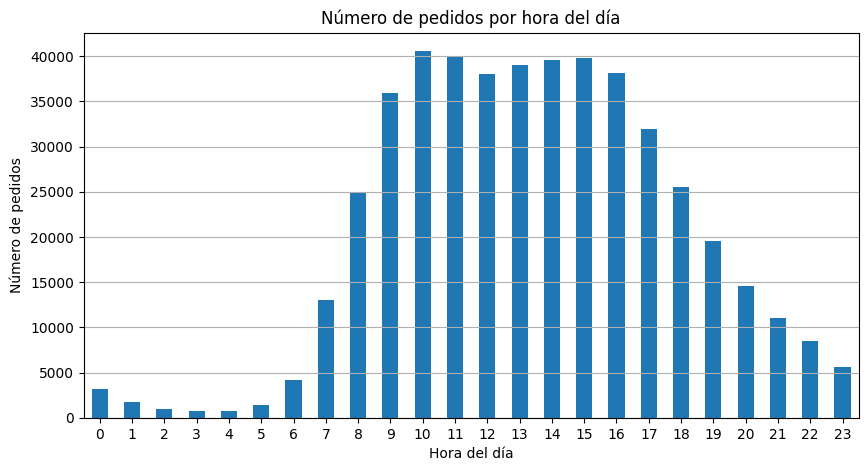

In [18]:
orders_por_hora = instacart_orders['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(10,5))
orders_por_hora.plot(kind='bar')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

Conclusiones
La mayoría de los pedidos se realizan entre las 9:00 a.m. y las 17:00 p.m., con un pico marcado entre las 10:00 y 11:00 a.m. Esto sugiere que las personas suelen hacer sus compras en horarios laborales o después del desayuno, probablemente antes de salir o al estar en casa.

### [A3] ¿Qué día de la semana compran víveres las personas?

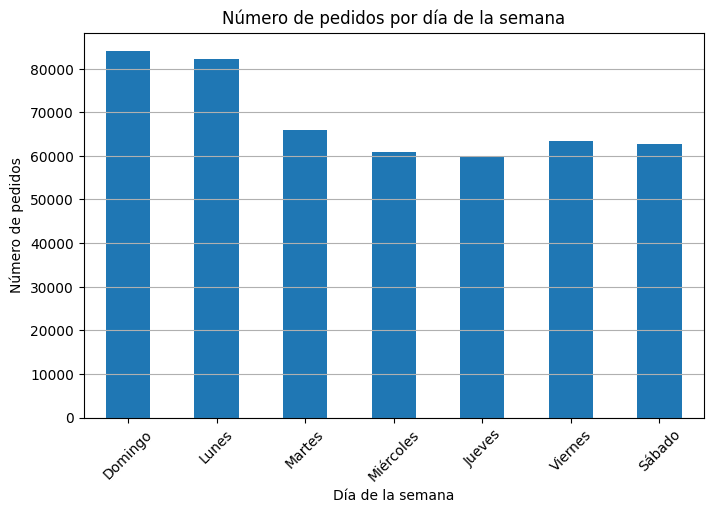

In [10]:
dias = ['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado']
orders_por_dia = instacart_orders['order_dow'].value_counts().sort_index()

plt.figure(figsize=(8,5))
orders_por_dia.plot(kind='bar')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(ticks=range(7), labels=dias, rotation=45)
plt.grid(axis='y')
plt.show()

Conclusiones

El día con mayor número de pedidos es el domingo, seguido por el lunes. Esto indica que muchas personas aprovechan el fin de semana para abastecerse, o bien, inician su semana laboral organizando las compras del hogar.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

Mínimo: 0.0
Máximo: 30.0


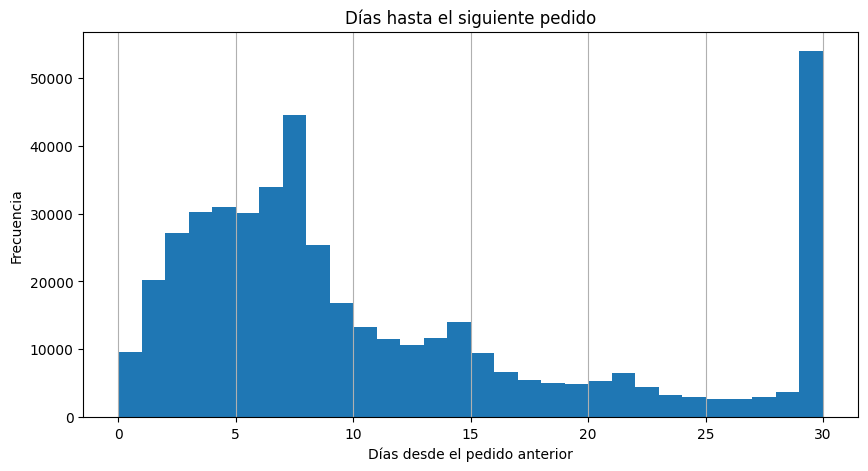

In [11]:
print("Mínimo:", instacart_orders['days_since_prior_order'].min())
print("Máximo:", instacart_orders['days_since_prior_order'].max())

instacart_orders['days_since_prior_order'].hist(bins=30, figsize=(10,5))
plt.title('Días hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

Conclusiones
El tiempo de espera entre pedidos varía desde 0 hasta 30 días, siendo este último probablemente el valor máximo definido por la plataforma. La mayoría de los usuarios hacen un nuevo pedido entre los 7 y 15 días, lo que indica hábitos de recompra quincenales o semanales, dependiendo del estilo de vida y consumo de cada cliente

# [B] Distribuciones

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Gráficos de barra para los dos días y descripción de las diferencias.

In [12]:
miercoles = instacart_orders[instacart_orders['order_dow'] == 3]
sabado = instacart_orders[instacart_orders['order_dow'] == 5]

In [13]:
miercoles_por_hora = miercoles['order_hour_of_day'].value_counts().sort_index()

In [14]:
sabado_por_hora = sabado['order_hour_of_day'].value_counts().sort_index()

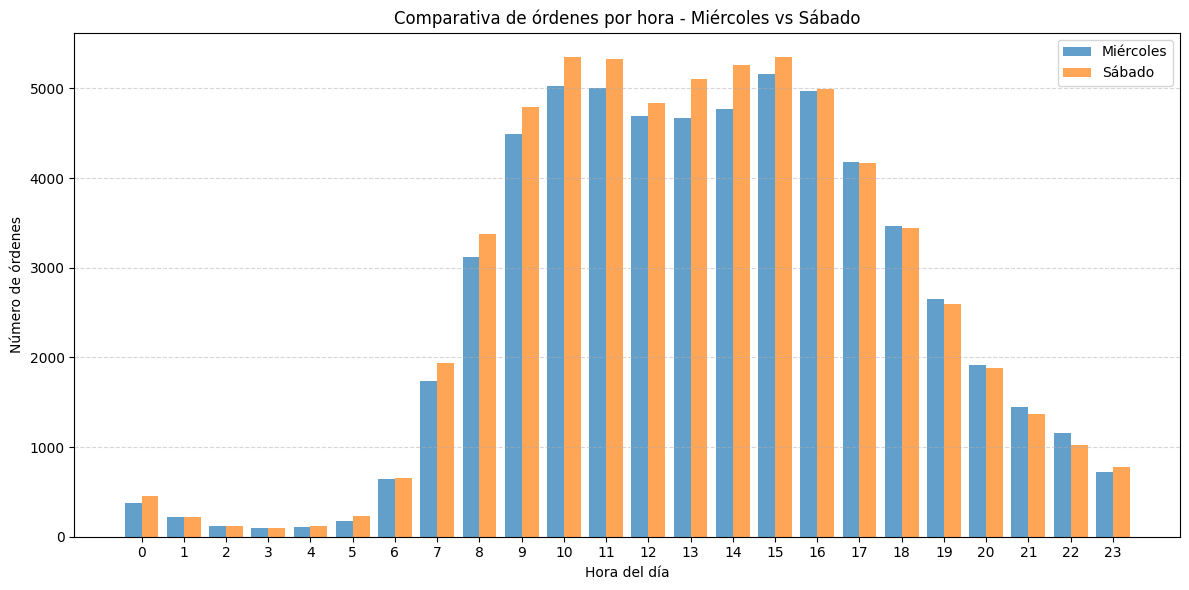

In [15]:

plt.figure(figsize=(12, 6))
plt.bar(miercoles_por_hora.index - 0.2, miercoles_por_hora.values, width=0.4, label='Miércoles', alpha=0.7)
plt.bar(sabado_por_hora.index + 0.2, sabado_por_hora.values, width=0.4, label='Sábado', alpha=0.7)
plt.xlabel('Hora del día')
plt.ylabel('Número de órdenes')
plt.title('Comparativa de órdenes por hora - Miércoles vs Sábado')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Conclusiones

La distribución muestra que los miércoles los pedidos tienden a concentrarse entre las 9:00 a.m. y las 15:00 p.m., mientras que los sábados se observa un ligero aumento en las órdenes durante la mañana temprano (alrededor de las 8:00 a.m.) y entre las 10:00 a.m. y 13:00 p.m., lo cual podría sugerir una tendencia de compras más matutinas en fines de semana.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [16]:
pedidos_por_usuario = instacart_orders['user_id'].value_counts()

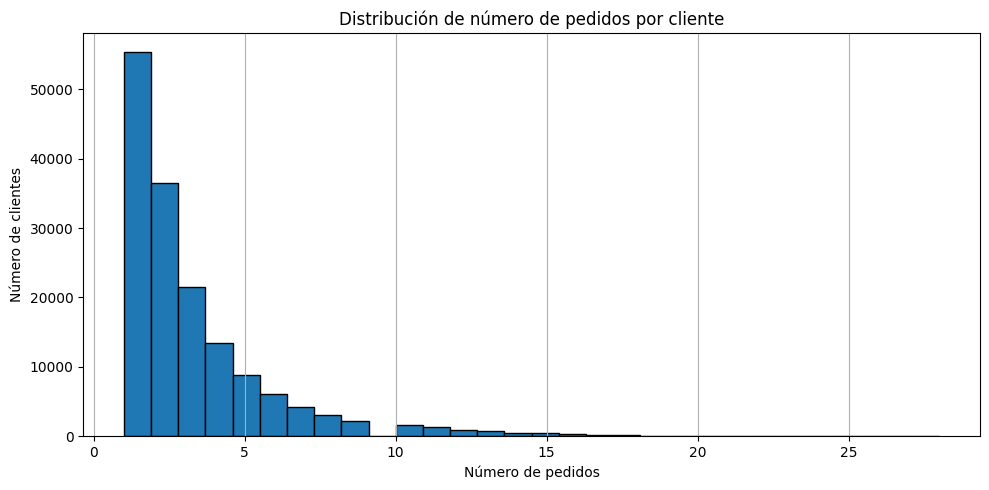

In [17]:
plt.figure(figsize=(10, 5))
pedidos_por_usuario.hist(bins=30, edgecolor='black')
plt.title('Distribución de número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Conclusiones

La mayoría de los clientes realizaron entre 1 y 10 pedidos, con una clara tendencia decreciente a medida que aumenta el número de órdenes. Esto indica que una gran parte de los usuarios son nuevos o hacen compras ocasionales, mientras que sólo una pequeña fracción son compradores frecuentes

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [22]:
productos_mas_frecuentes = order_products['product_id'].value_counts().head(20).reset_index()
productos_mas_frecuentes.columns = ['product_id', 'count']

productos_populares = productos_mas_frecuentes.merge(products, on='product_id')[['product_id', 'count', 'product_name']]

productos_populares.columns = ['ID de Producto', 'Número de pedidos', 'Nombre del Producto']

In [23]:
productos_populares = productos_populares.sort_values('Número de pedidos', ascending=False)

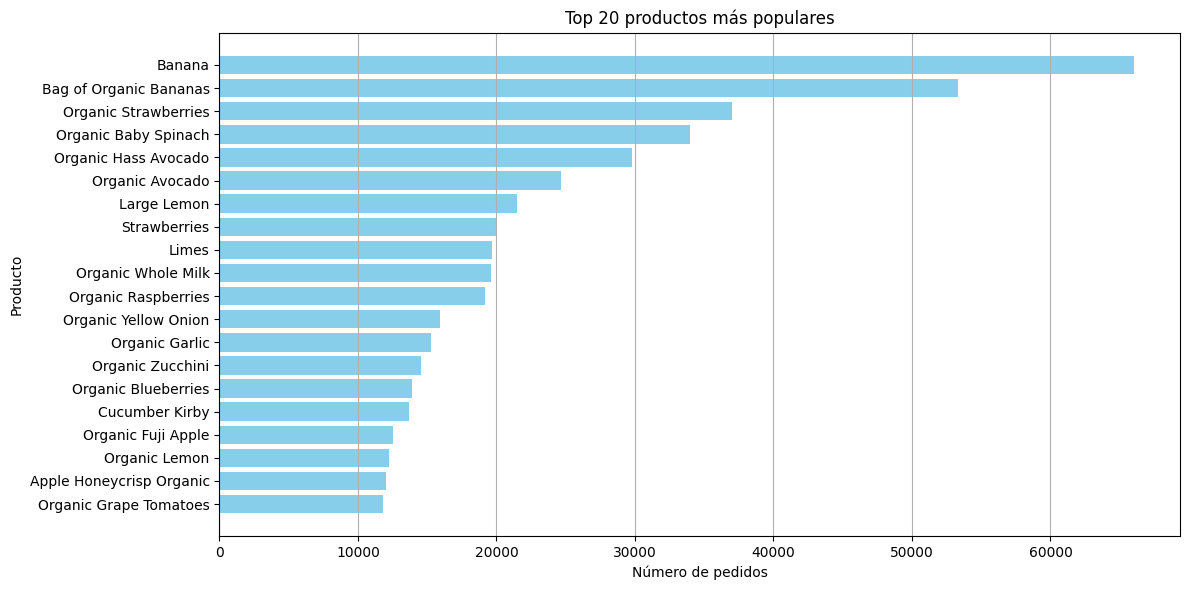

In [25]:
plt.figure(figsize=(12, 6))
plt.barh(productos_populares['Nombre del Producto'], productos_populares['Número de pedidos'], color='skyblue')
plt.xlabel('Número de pedidos')
plt.ylabel('Producto')
plt.title('Top 20 productos más populares')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Conclusiones

Los 20 productos más populares incluyen principalmente frutas y verduras orgánicas. El producto más solicitado es el plátano, seguido de las bolsas de plátanos orgánicos, fresas orgánicas, espinaca baby orgánica y aguacates. Esta tendencia sugiere una preferencia fuerte por productos frescos y saludables por parte de los clientes. Además, destaca el interés en opciones orgánicas, lo que puede reflejar un perfil de consumidor consciente de su salud o del impacto ambiental.

# [C] Analisis final

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [27]:
articulos_por_pedido = order_products.groupby('order_id')['product_id'].count()
articulos_por_pedido.describe()

count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
Name: product_id, dtype: float64

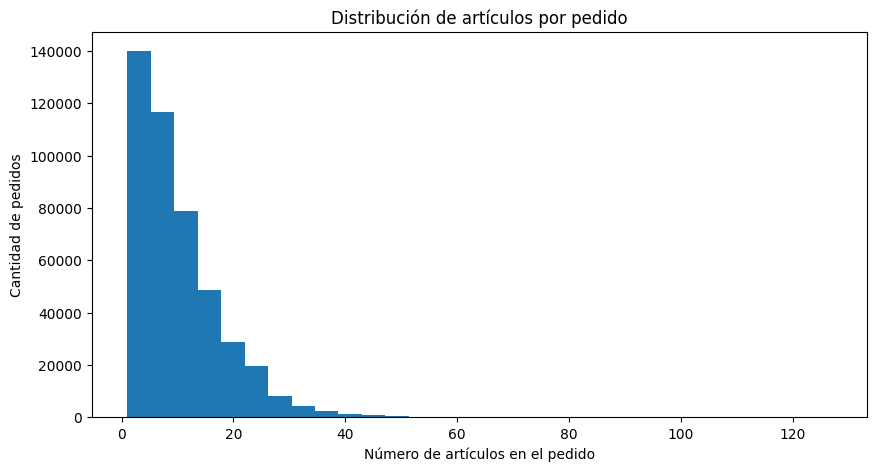

In [28]:
plt.figure(figsize=(10,5))
articulos_por_pedido.hist(bins=30)
plt.title('Distribución de artículos por pedido')
plt.xlabel('Número de artículos en el pedido')
plt.ylabel('Cantidad de pedidos')
plt.grid(False)
plt.show()

In [29]:
pedidos_por_cantidad = order_products.groupby('order_id').size().value_counts().sort_index()

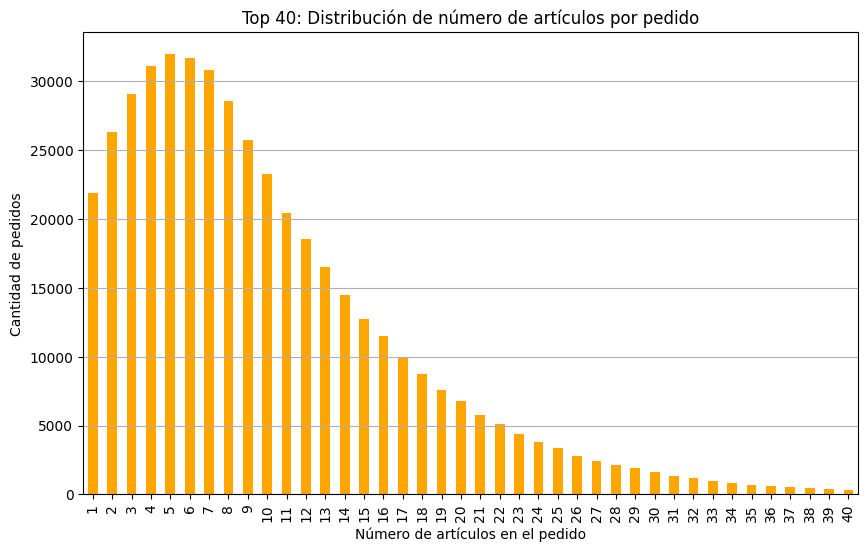

In [30]:
plt.figure(figsize=(10, 6))
pedidos_por_cantidad.head(40).plot(kind='bar', color='orange')
plt.xlabel('Número de artículos en el pedido')
plt.ylabel('Cantidad de pedidos')
plt.title('Top 40: Distribución de número de artículos por pedido')
plt.grid(axis='y')
plt.show()

In [30]:
articulos_por_pedido.mode().iloc[0]

5

Conclusiones

La cantidad de artículos por pedido varía ampliamente, pero en promedio los clientes agregan entre 5 y 10 productos por pedido. La moda muestra que el número más frecuente de artículos comprados en un pedido es 5, lo que indica que los clientes suelen hacer compras pequeñas y frecuentes. La distribución está sesgada a la derecha, lo que sugiere que existen algunos pedidos con muchos más productos, pero son menos comunes

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [31]:
productos_reordenados = order_products[order_products['reordered'] == 1]

In [32]:
top_reordenados = productos_reordenados['product_id'].value_counts().head(20).reset_index()
top_reordenados.columns = ['product_id', 'count']
top_reordenados = top_reordenados.merge(products, on='product_id')[['product_id', 'product_name', 'count']]
top_reordenados.columns = ['ID de Producto', 'Nombre del Producto', 'Veces Reordenado']
top_reordenados

,ID de Producto,Nombre del Producto,Veces Reordenado
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629
5,47766,Organic Avocado,18743
6,27845,Organic Whole Milk,16251
7,47626,Large Lemon,15044
8,27966,Organic Raspberries,14748
9,16797,Strawberries,13945


In [33]:
top_reordenados.head()

,ID de Producto,Nombre del Producto,Veces Reordenado
0,24852,Banana,55763
1,13176,Bag of Organic Bananas,44450
2,21137,Organic Strawberries,28639
3,21903,Organic Baby Spinach,26233
4,47209,Organic Hass Avocado,23629


<AxesSubplot:xlabel='Nombre del Producto'>

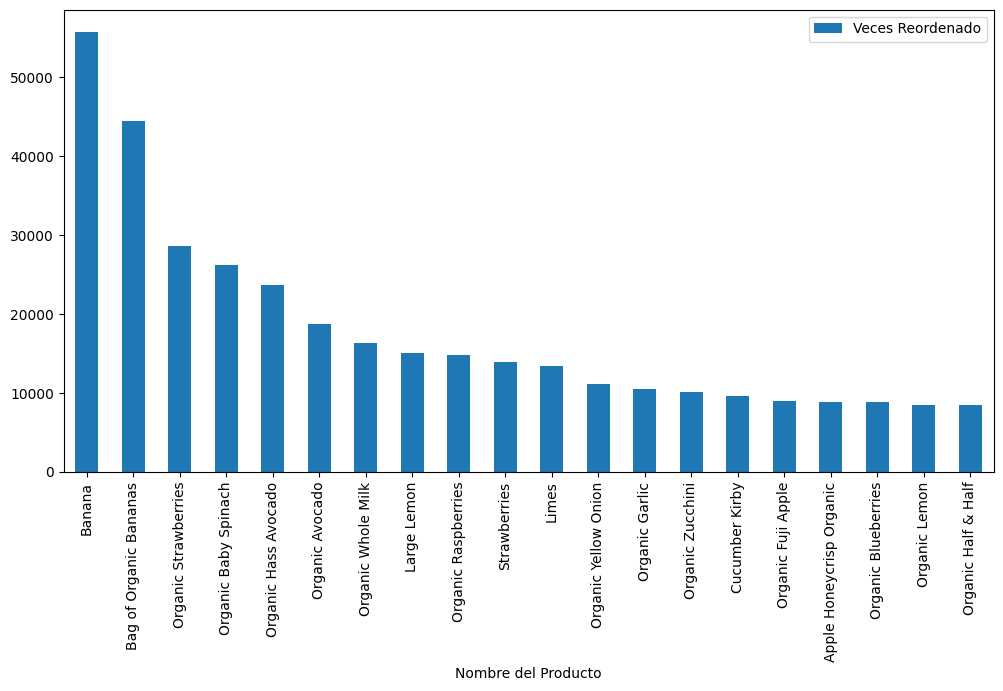

In [34]:
top_reordenados.plot(kind='bar', x='Nombre del Producto', y='Veces Reordenado', figsize=(12,6))

Conclusiones
Los 20 productos más reordenados muestran una tendencia clara hacia frutas y verduras orgánicas. Esto podría indicar que las personas tienen hábitos de compra constantes con productos saludables y frescos. Destacan los plátanos, espinaca baby, fresas y aguacates, reflejando patrones de consumo regulares

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [35]:
total_por_producto = order_products.groupby('product_id')['reordered'].count()
reordenado_por_producto = order_products.groupby('product_id')['reordered'].sum()
tasa_reorden = (reordenado_por_producto / total_por_producto).reset_index()
tasa_reorden.columns = ['product_id', 'tasa_reorden']
tasa_reorden = tasa_reorden.merge(products, on='product_id')[['product_id', 'product_name', 'tasa_reorden']]
tasa_reorden.sort_values(by='tasa_reorden', ascending=False).head(10)

,product_id,product_name,tasa_reorden
13453,14721,Bone Strength Take Care,1.0
19195,20949,Vanilla Sandwich Cookies,1.0
6136,6723,Palmiers- Petite,1.0
6144,6732,Naturally Sparkling Mineral Water,1.0
41319,45088,California Dill Pollen & Garlic Goat Cheese & ...,1.0
41310,45078,Pomegranatea,1.0
19258,21016,Parchment Lined 8 in x 3.75 in x 2.5 in Pans,1.0
19248,21005,Peanut Butter Pie Ice Cream,1.0
32273,35192,Chocolate Soy Milk Singles,1.0
32277,35197,Mocha Chocolate Chip Organic Non-Dairy Frozen...,1.0


In [36]:
tasa_reorden.sort_values(by='tasa_reorden', ascending=False).head(10)

,product_id,product_name,tasa_reorden
13453,14721,Bone Strength Take Care,1.0
19195,20949,Vanilla Sandwich Cookies,1.0
6136,6723,Palmiers- Petite,1.0
6144,6732,Naturally Sparkling Mineral Water,1.0
41319,45088,California Dill Pollen & Garlic Goat Cheese & ...,1.0
41310,45078,Pomegranatea,1.0
19258,21016,Parchment Lined 8 in x 3.75 in x 2.5 in Pans,1.0
19248,21005,Peanut Butter Pie Ice Cream,1.0
32273,35192,Chocolate Soy Milk Singles,1.0
32277,35197,Mocha Chocolate Chip Organic Non-Dairy Frozen...,1.0


<AxesSubplot:xlabel='product_name'>

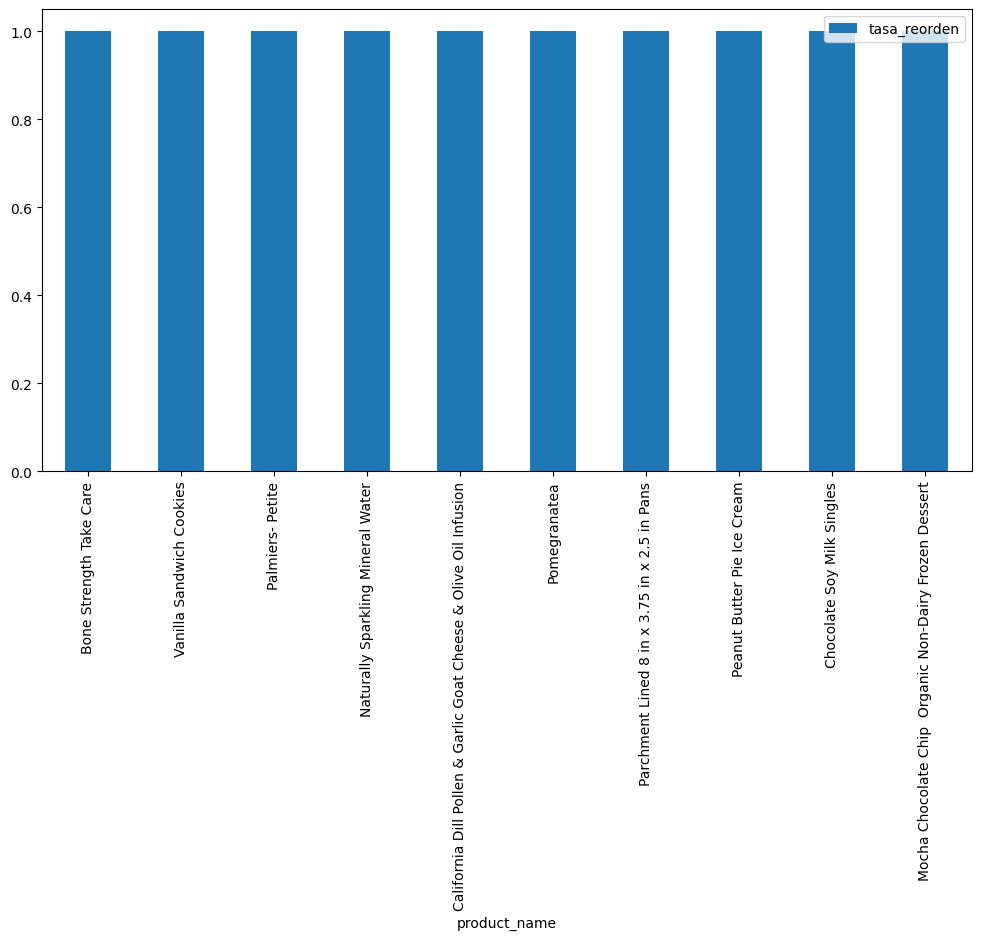

In [37]:
tasa_reorden.sort_values(by='tasa_reorden', ascending=False).head(10).plot(
    kind='bar', x='product_name', y='tasa_reorden', figsize=(12,6)
)

Conclusiones

Los productos con mayor tasa de repetición son los que los usuarios vuelven a pedir con más frecuencia. Algunos tienen una tasa superior al 90%, lo que indica gran satisfacción o necesidad recurrente. Esto permite identificar productos esenciales dentro del comportamiento de compra

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [40]:
order_user = order_products.merge(instacart_orders[['order_id', 'user_id']], on='order_id')
reorden_por_usuario = order_user.groupby('user_id')['reordered'].mean().reset_index()
reorden_por_usuario.columns = ['user_id', 'proporcion_reorden']
reorden_por_usuario.head()

,user_id,proporcion_reorden
0,2,0.038462
1,4,0.000000
2,5,0.666667
3,6,0.000000
4,7,0.928571


<AxesSubplot:ylabel='Frequency'>

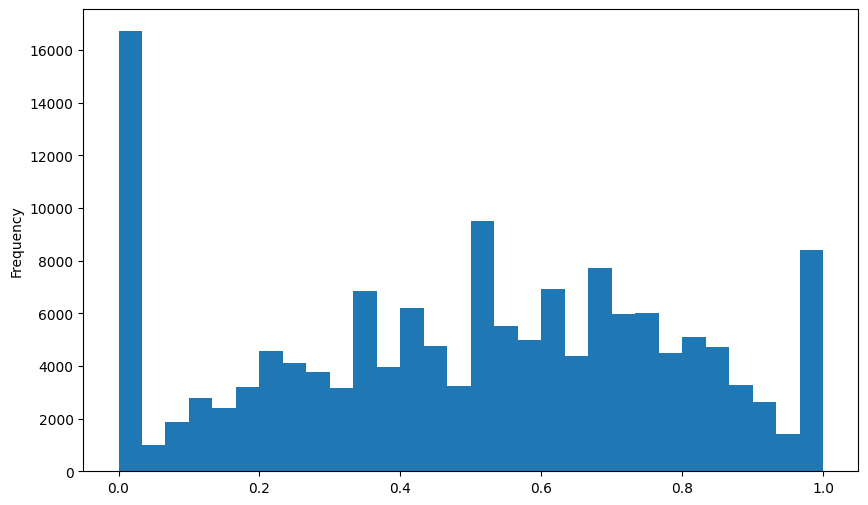

In [41]:
reorden_por_usuario['proporcion_reorden'].plot(kind='hist', bins=30, figsize=(10,6))

Conclusiones
Al calcular la proporción de productos que ya habían sido pedidos por cada cliente, encontramos que algunos usuarios tienen un comportamiento de recompra alto, mientras que otros compran productos nuevos con más frecuencia. Esta información puede ser útil para segmentar a los usuarios según su lealtad a ciertos productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [32]:
primeros_productos = order_products[order_products['add_to_cart_order'] == 1]

In [33]:
primeros_mas_frecuentes = primeros_productos['product_id'].value_counts().head(20).reset_index()
primeros_mas_frecuentes.columns = ['product_id', 'count']

In [34]:
primeros_mas_frecuentes = primeros_mas_frecuentes.merge(products[['product_id', 'product_name']], on='product_id')
primeros_mas_frecuentes

,product_id,count,product_name
0,24852,15562,Banana
1,13176,11026,Bag of Organic Bananas
2,27845,4363,Organic Whole Milk
3,21137,3946,Organic Strawberries
4,47209,3390,Organic Hass Avocado
5,21903,3336,Organic Baby Spinach
6,47766,3044,Organic Avocado
7,19660,2336,Spring Water
8,16797,2308,Strawberries
9,27966,2024,Organic Raspberries


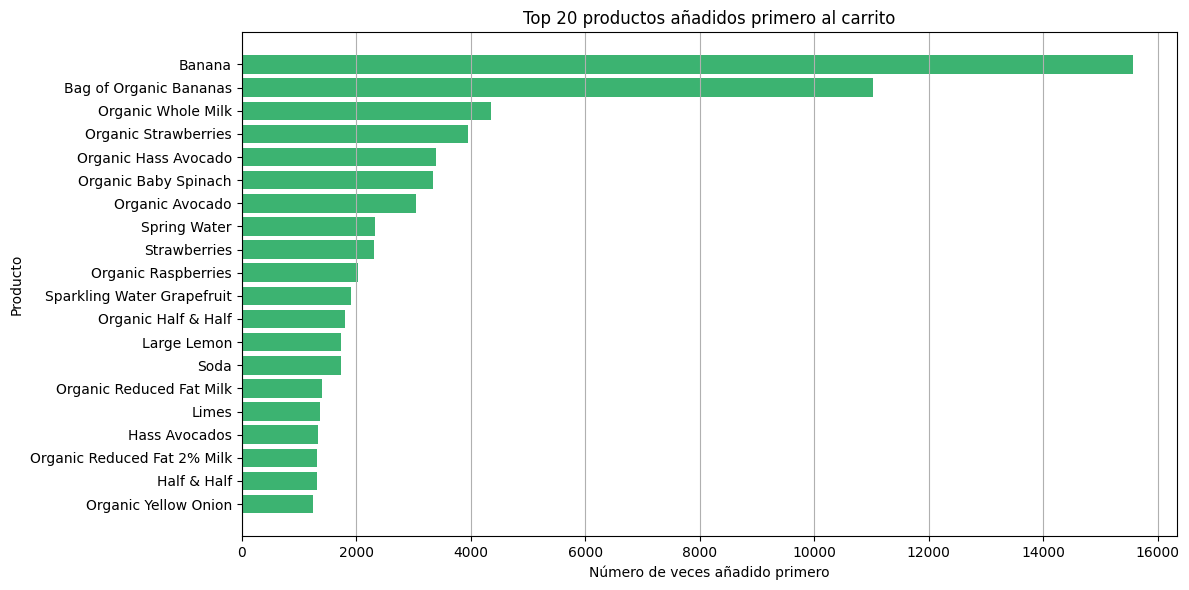

In [46]:
plt.figure(figsize=(12, 6))
plt.barh(primeros_mas_frecuentes['product_name'], primeros_mas_frecuentes['count'], color='mediumseagreen')
plt.xlabel('Número de veces añadido primero')
plt.ylabel('Producto')
plt.title('Top 20 productos añadidos primero al carrito')
plt.gca().invert_yaxis()  # Para que el más popular quede arriba
plt.grid(axis='x')
plt.tight_layout()
plt.show()

Conclusiones

Entre los 20 artículos que más se agregan como primeros en el carrito, destacan productos básicos y frescos como plátanos, leche, espinaca y fresas orgánicas. Esto sugiere que las personas tienden a comenzar su compra con productos esenciales y de consumo frecuente.

### Conclusion general del proyecto:

Durante el análisis de datos de Instacart, realice una limpieza profunda 
de dataset, eliminando duplicados, tratando valores nulos y asegurando la calidad de los datos. 
A partir de ello, se identificaron patrones de compra claros: los usuarios tienden a comprar productos frescos y orgánicos, 
con comportamientos de recompra frecuentes. 

También observé que los pedidos se concentran en ciertas horas y días, 
y que existen productos preferidos que son recurrentemente agregados primero al carrito. 
Este análisis permite considerar lo siguiente:
    
- segmentar a los clientes 
- entender su comportamiento
- ofrecer oportunidades para personalizar ofertas
- mejorar la experiencia de compra
- optimizar la logística.